In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# 图像读取

def cv_show(img):
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
# 转换bgr为rgb

def convertRGB(imgs):
    for i in range(len(imgs)):
        imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
    
    return imgs

In [4]:
img = cv2.imread("data/image/boat1.jpeg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
# cv_show(img_gray)

## 图像阈值

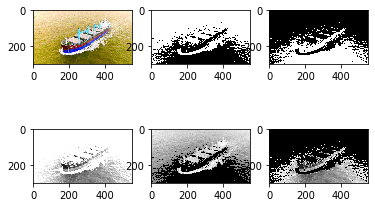

In [6]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')

## 图像平滑

In [7]:
img = cv2.imread("data/image/boat2.jpeg")

# cv_show(img)

In [8]:
# 均值滤波
blur = cv2.blur(img, (3, 3))

In [9]:
# 方框滤波，可选择归一化
box = cv2.boxFilter(img, -1, (3, 3), normalize=True)

In [10]:
# 高斯滤波，滤波器中的数值满足高斯分布；离中心越近，更加注重，权重更大
guassian = cv2.GaussianBlur(img, (5, 5), 1)

In [11]:
# 中值滤波，将像素从小到大排序，获取中间数，并用中间数替代所有其他的像素；去除椒盐噪声效果较好
median = cv2.medianBlur(img, 5)

In [12]:
# 展示上述所有图像
res = np.hstack((blur, guassian, median))

# cv_show(res)

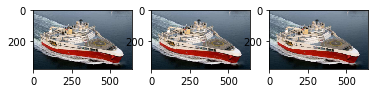

In [13]:
images = [blur, guassian, median]
images = convertRGB(images)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])